## Libraries

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from datetime import date,timedelta
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

import matplotlib.pyplot as plt
import pandas as pd

from pandas import DataFrame
from matplotlib import pyplot

import itertools
import numpy as np
from pandas import read_excel
import matplotlib
import datetime as dt


## Dates used in project

In [25]:
today = date.today() 
print("Today date is: ", today)
tomorrow = today + timedelta(days=1)
tomorrow_string = str(tomorrow)
print("tomorrow date is: ", tomorrow)
print("to string : " , tomorrow_string)
print(type(tomorrow_string))
next_week_begin = today + timedelta(days=7)
print("Next week is :", next_week_begin)
next_week_end = next_week_begin + timedelta(days=7)
print("End next week is :", next_week_end)

Today date is:  2021-01-14
tomorrow date is:  2021-01-15
to string :  2021-01-15
<class 'str'>
Next week is : 2021-01-21
End next week is : 2021-01-28


## Loading of the the dataset

In [26]:
data = pd.read_excel('WindForecast_20210112-20210118.xls' , header = None  ,index_col= False )
data = data.iloc[4:]
data.columns = ['DateTime','Week-ahead Forecast [MW]','Day-ahead forecast [MW]' , 'Most recent forecast [MW]','Measured & upscaled [MW]','Monitored Capacity [MW]','Active Decremental Bids [yes/no]' ,'Day-ahead forecast(11h00) [MW]']
data['DateTime'] = pd.to_datetime(data['DateTime'])

# EDA : Exploratory Data Analysis

In [27]:
data.head()

,DateTime,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
4,2021-12-01 00:00:00,1466.06,3558.2,3536.08,3390.06,4670.83,No,3508.03
5,2021-12-01 00:15:00,1510.05,3566.38,3544.98,3433.99,4670.83,No,3518.98
6,2021-12-01 00:30:00,1442.41,3572.99,3554,3482.05,4670.83,No,3527.87
7,2021-12-01 00:45:00,1458.09,3578.06,3562.79,3486.22,4670.83,No,3535.23
8,2021-12-01 01:00:00,1493.55,3580.62,3501.62,3498.25,4670.83,No,3540.6


In [28]:
data.describe()

<ipython-input-28-2bb0b18689d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,DateTime,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
count,672,672.00,288.00,672.00,252.00,672.000,672,384.00
unique,672,668.00,288.00,671.00,252.00,1.000,1,384.00
top,2021-01-17 01:15:00,2136.02,625.05,2035.69,1534.96,4670.829,No,3583.96
freq,1,2.00,1.00,2.00,1.00,672.000,672,1.00
first,2021-01-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-01 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# From the information above you see that all the data is normalized between -1.0 and 1.0
# Check the datatypes used in this dataset
data.dtypes.value_counts()

object            7
datetime64[ns]    1
dtype: int64

In [30]:
# Show the last 5 datatypes
data.dtypes.tail()

Most recent forecast [MW]           object
Measured & upscaled [MW]            object
Monitored Capacity [MW]             object
Active Decremental Bids [yes/no]    object
Day-ahead forecast(11h00) [MW]      object
dtype: object

### Changing dataset for DateTime Index

In [31]:
data.to_csv('Windforcast.csv' , index = False)
df = pd.read_csv('Windforcast.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df[df['DateTime'].dt.minute == 0]
df.head()


,DateTime,Week-ahead Forecast [MW],Day-ahead forecast [MW],Most recent forecast [MW],Measured & upscaled [MW],Monitored Capacity [MW],Active Decremental Bids [yes/no],Day-ahead forecast(11h00) [MW]
0,2021-12-01 00:00:00,1466.06,3558.20,3536.08,3390.06,4670.829,No,3508.03
4,2021-12-01 01:00:00,1493.55,3580.62,3501.62,3498.25,4670.829,No,3540.60
8,2021-12-01 02:00:00,1597.20,3586.57,3536.58,3531.04,4670.829,No,3548.69
12,2021-12-01 03:00:00,1684.34,3593.28,3616.85,3578.76,4670.829,No,3562.67
16,2021-12-01 04:00:00,1689.73,3592.74,3649.54,3632.46,4670.829,No,3581.01


In [32]:
data_model = pd.DataFrame()
data_model["ds"] = df['DateTime']
data_model["y"] = df['Most recent forecast [MW]']
data_model


,ds,y
0,2021-12-01 00:00:00,3536.08
4,2021-12-01 01:00:00,3501.62
8,2021-12-01 02:00:00,3536.58
12,2021-12-01 03:00:00,3616.85
16,2021-12-01 04:00:00,3649.54
...,...,...
652,2021-01-18 19:00:00,2024.88
656,2021-01-18 20:00:00,1944.39
660,2021-01-18 21:00:00,2018.25
664,2021-01-18 22:00:00,2039.14


In [33]:
import math

from sklearn.model_selection import train_test_split

data_model= data_model.reset_index(drop=True)
count_rows = len(data_model.index)
train_length = round((count_rows / 100)*75)
test_length = round((count_rows / 100)*25)

print(count_rows)
print(train_length)
print(test_length)

168
126
42


# Preparing train and test set

In [34]:
train = data_model['y'].dropna().iloc[0:train_length]  # making of train dataset
train_data =  data_model['ds'].dropna().iloc[0:train_length]  # making of train dataset

test = data_model['y'].dropna().iloc[train_length:]   # making of test dataset
test_data =  data_model['ds'].dropna().iloc[train_length:]  # making of train dataset


In [35]:
data_model_train = pd.DataFrame()
data_model_train['ds'] = train_data.dropna()
data_model_train['y'] = train_data.dropna()
data_model_train.head()

,ds,y
0,2021-12-01 00:00:00,2021-12-01 00:00:00
1,2021-12-01 01:00:00,2021-12-01 01:00:00
2,2021-12-01 02:00:00,2021-12-01 02:00:00
3,2021-12-01 03:00:00,2021-12-01 03:00:00
4,2021-12-01 04:00:00,2021-12-01 04:00:00


In [36]:
data_model_test = pd.DataFrame()
data_model_test['ds'] = test_data
data_model_test['y'] = test
data_model_test.head()


,ds,y
126,2021-01-17 06:00:00,2202.41
127,2021-01-17 07:00:00,2246.46
128,2021-01-17 08:00:00,2330.59
129,2021-01-17 09:00:00,2362.62
130,2021-01-17 10:00:00,2425.64


#  Making model fbprophet

In [37]:
# Python
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation


m = Prophet()
m.fit(data_model_train)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [38]:
# Python
future = m.make_future_dataframe(periods=8 , freq='H')
future.tail()

,ds
129,2021-12-02 03:00:00
130,2021-12-02 04:00:00
131,2021-12-02 05:00:00
132,2021-12-02 06:00:00
133,2021-12-02 07:00:00


In [39]:
# Python
predictions = m.predict(data_model_test)
predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
37,2021-01-18 19:00:00,1.610997e+18,1.610997e+18,1.610997e+18
38,2021-01-18 20:00:00,1.611000e+18,1.611000e+18,1.611000e+18
39,2021-01-18 21:00:00,1.611004e+18,1.611004e+18,1.611004e+18
40,2021-01-18 22:00:00,1.611008e+18,1.611008e+18,1.611008e+18
41,2021-01-18 23:00:00,1.611011e+18,1.611011e+18,1.611011e+18


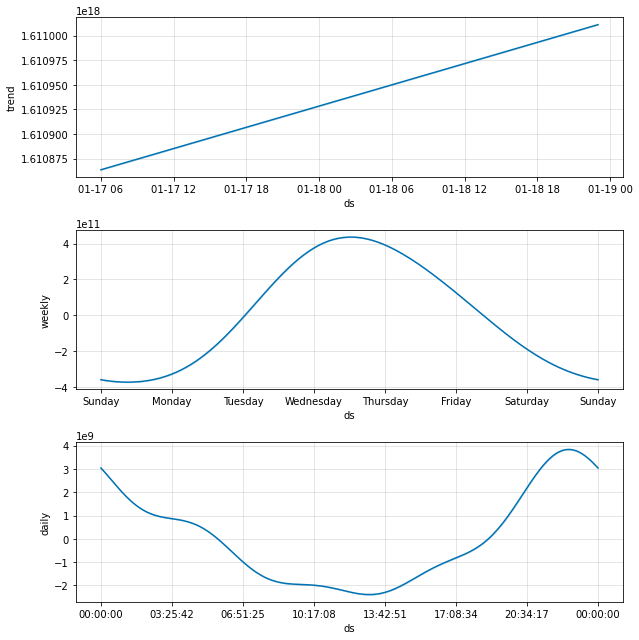

In [40]:
# Python
fig2 = m.plot_components(predictions)


In [41]:
## Regression Evaluation Metrics fb proophet

In [ ]:
# Python
df_cv = cross_validation(m, initial= '210 days', period='8 days' , horizon = '20 days')


INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-11-11 23:00:00 and 2021-11-11 23:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Python
df_p = performance_metrics(predictions)
df_p.head()

## Pickle file for deployment

In [ ]:
import pickle
pickle.dump(m, open('fbprophet.pkl','wb'))